In [4]:
import stt as st
import scanpy as sc
import matplotlib as mpl

In [5]:
adata = sc.read_h5ad('../data/toggle_switch/data_toggle.h5ad')
adata.obs['attractor']=adata.obs['leiden']

In [6]:
import scvelo as scv
scv.pp.moments(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
adata_aggr = st.tl.dynamical_iteration(adata,n_states =2, n_iter = 10, n_neighbors = 100,return_aggr_obj=True, weight_connectivities = 0.2, n_components = 21)

  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=16415, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.6929753699151463


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=24878, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.5527460544525185


  0%|          | 0/10010 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=13446, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.5503135643409037


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=54018, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.3623227228317148


  0%|          | 0/10010 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: 

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=4282, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.07796573914590366


/mnt/d/OneDrive/文档/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:243: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


In [8]:
import scvelo as scv
sc.tl.pca(adata_aggr, svd_solver='arpack')

In [9]:
adata_aggr.obs['rho_1']= adata.uns['da_out']['membership'][:,1]
adata_aggr.obs['attractor'] = adata.obs['attractor']
adata_aggr.obs['leiden'] = adata.obs['leiden']

In [10]:
sc.set_figure_params(dpi=600,fontsize = 18)
sc.pl.embedding(adata_aggr,color = ['leiden','attractor','speed','entropy'],basis = 'pca')

In [11]:
scv.tl.velocity_graph(adata_aggr)

computing velocity graph (using 1/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


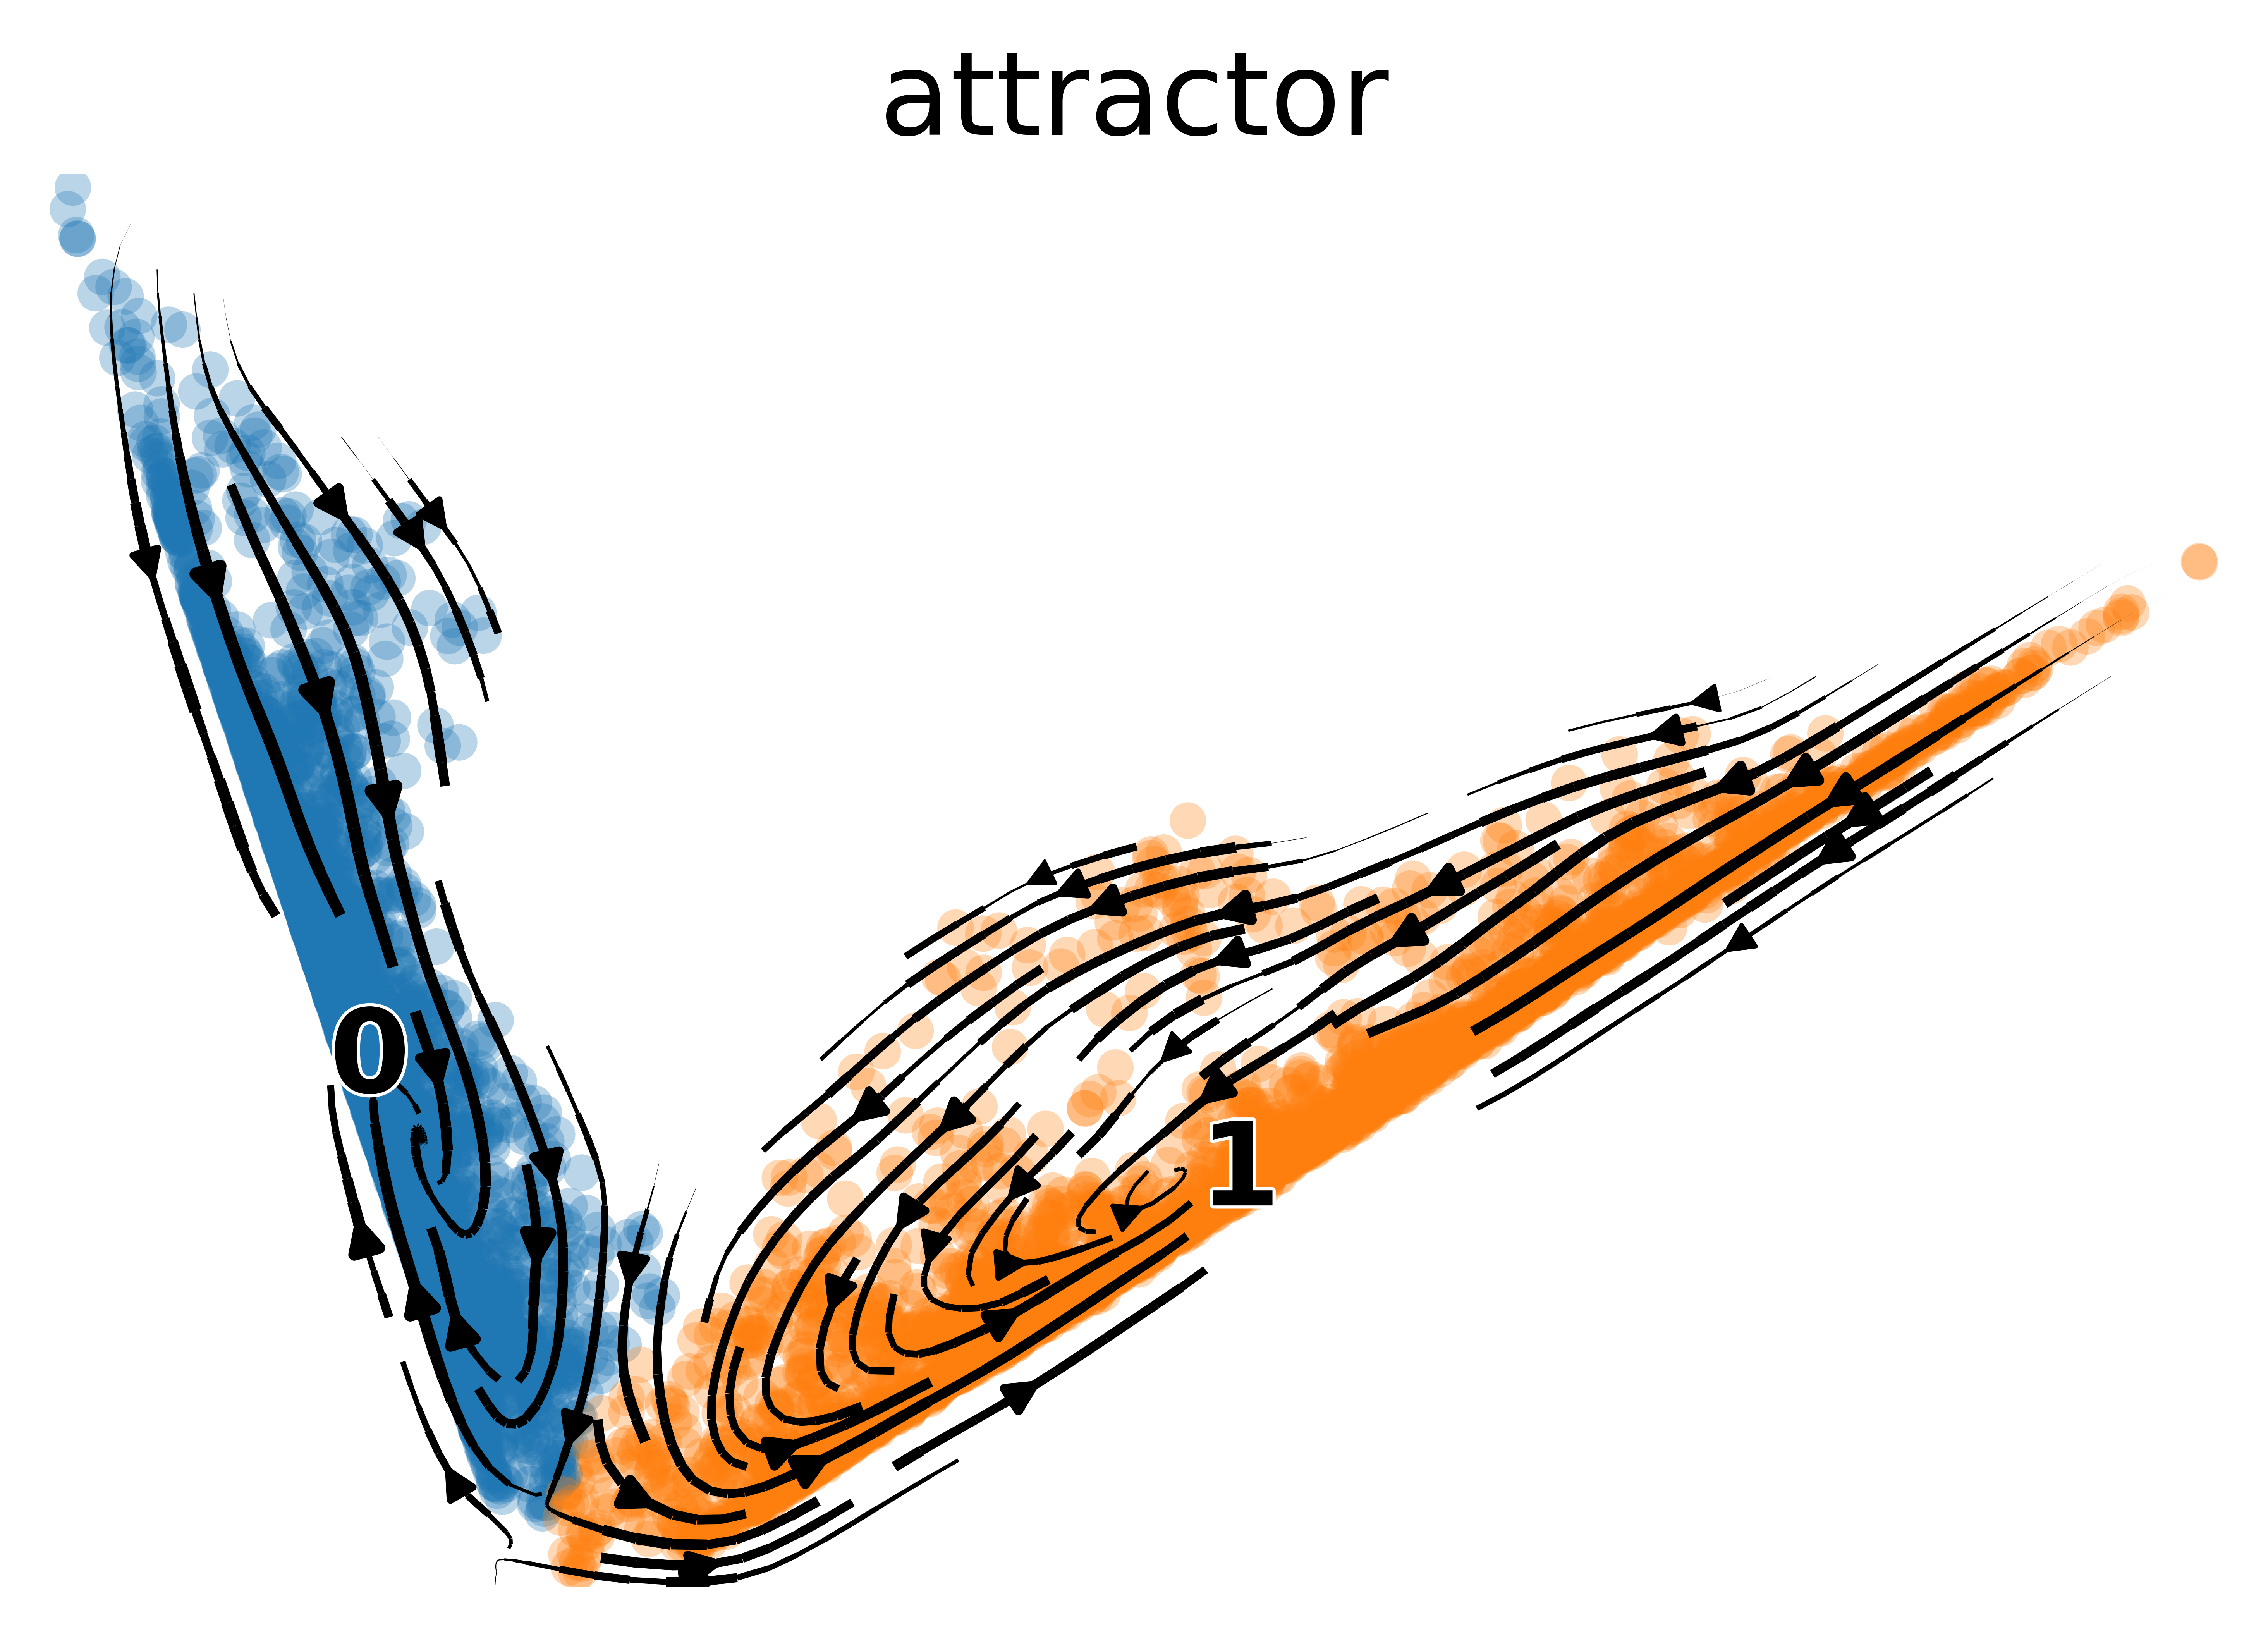

In [12]:
scv.set_figure_params(dpi =600,fontsize = 18)
scv.pl.velocity_embedding_stream(adata_aggr, basis='pca', color='attractor')

In [11]:
#import numpy as np
#np.save('../data/toggle_switch/toggle_pca.npy',adata_aggr.obsm['X_pca'])

View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:05) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:05) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:05) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
[0]PETSC ERROR: ------------------------------------------------------------------------


    finished (0:00:02) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 32/32 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)


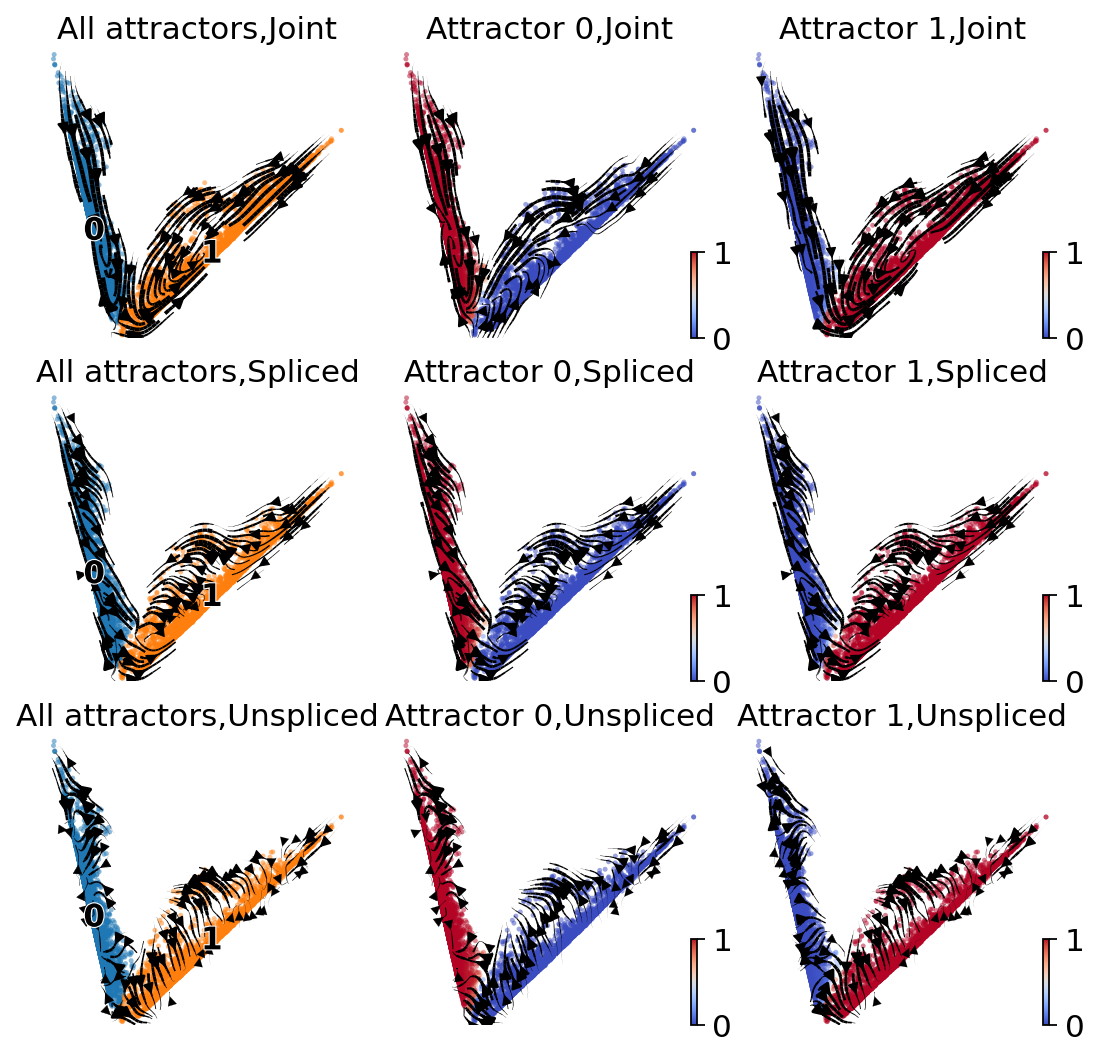

In [14]:
sc.set_figure_params(fontsize = 14)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
adata.obsm['X_pca_aggr']=adata_aggr.obsm['X_pca']
st.pl.plot_tensor(adata, adata_aggr,  basis = 'pca')